In [1]:
import xarray as xr
import xesmf as xe
import numpy as np 
import pathlib as pl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
data_path = "../"
database = data_path + "/CO_snotel.db"
dbengine = "sqlite:///{}".format(database)

df_butte     = pd.read_sql_table('380', dbengine)
df_schofield = pd.read_sql_table('737', dbengine)
df_taylor    = pd.read_sql_table('1141', dbengine)

# fix the indices
df_butte    = df_butte.set_index("Date")
df_schofield = df_schofield.set_index("Date")
df_taylor   = df_taylor.set_index("Date")


In [3]:
bute_lat, bute_lon = 38.89, -106.95
scho_lat, scho_lon = 39.02, -107.05
tayl_lat, tayl_lon = 38.99, -106.75

In [4]:
def get_wrf_precip(WY, 
                   base,
                   mlist=["10","11","12", "01", "02", "03", "04"]):
    
    listofwrf = [base.joinpath("WY%s/Month%s_SfcMet_wsub_WY%s.nc"%(WY,x,WY)) for x in mlist]

    good_files = [phile.is_file() for phile in listofwrf]
    if False in good_files:
        print(good_files, "missing files")
        return None, None

    ds=xr.open_mfdataset(listofwrf, combine='nested', concat_dim='XTIME', parallel=True)
    return ds
    



In [5]:
mp08_run = pl.Path("/scratch/wrudisill/EastLSM_Only/WRF_subset_files/Thompson")
mp10_run = pl.Path("/scratch/wrudisill/EastLSM_Only/WRF_subset_files/Morrison")
mp55_run = pl.Path("/scratch/wrudisill/EastLSM_Only/WRF_subset_files/Ishmael")

In [6]:
# ds = xr.open_dataset("/scratch/wrudisill/EastLSM_Only/WRF_subset_files/Thompson/WY2018/Month12_SfcMet_wsub_WY2018.nc")
# del ds["RAINNC"]
# del ds['I_RAINNC']

# ds['ACSWUPT'] = ds['T2'] * 0.
# ds['SWUPT']   = ds['T2'] * 0.
# ds['LWUPT']   = ds['T2'] * 0.

# ds.to_netcdf("/scratch/wrudisill/EastLSM_Only/WRF_subset_files/Thompson/WY2018/Month12_SfcMet_wsub_WY2018_std.nc")

In [7]:
mp08_2018 = get_wrf_precip(2018, mp08_run)
mp08_2019 = get_wrf_precip(2019, mp08_run)

mp10_2018 = get_wrf_precip(2018, mp10_run)
mp10_2019 = get_wrf_precip(2019, mp10_run)

mp55_2018 = get_wrf_precip(2018, mp55_run)
mp55_2019 = get_wrf_precip(2019, mp55_run)



In [8]:
def get_wrf_xy(lat, lon):
    #lat = 38.89
    #lon = -106.95
    xlat = mp55_2018.XLAT.values
    xlon = mp55_2018.XLONG.values
    dist = np.sqrt((xlat - lat)**2 + (xlon - lon)**2)
    mindist = dist.min()
    ixlat = np.argwhere(dist == mindist)[0][0]
    ixlon = np.argwhere(dist == mindist)[0][1]
    return {"south_north":ixlat, "west_east":ixlon}



In [9]:
# fig,ax = plt.subplots()
# fig.set_size_inches(12,12)

# # wrf_at_taylor = (mp08_2018.sel(get_wrf_xy(tayl_lat, tayl_lon)).T2 -273.15)
# # wrf_at_taylor_rolling

# (mp08_2018.sel(get_wrf_xy(tayl_lat, tayl_lon)).T2 -273.15).rolling(XTIME=24*7).mean().plot(label="mp08")
# (mp10_2018.sel(get_wrf_xy(tayl_lat, tayl_lon)).T2 -273.15).rolling(XTIME=24*7).mean().plot(label="mp10")
# (mp55_2018.sel(get_wrf_xy(tayl_lat, tayl_lon)).T2 -273.15).rolling(XTIME=24*7).mean().plot(label="mp55")


# # .plot(ax=ax, label='wrf')
# ((df_taylor.TavgF - 32.)*(5/9)).loc["2017-10-01":"2018-05-01"].rolling(7).mean().plot(ax=ax, label='snotel')
# plt.legend()

In [10]:
# fig,ax = plt.subplots()
# fig.set_size_inches(12,12)

# # wrf_at_taylor = (mp08_2018.sel(get_wrf_xy(tayl_lat, tayl_lon)).T2 -273.15)
# # wrf_at_taylor_rolling

# (mp08_2019.sel(get_wrf_xy(tayl_lat, tayl_lon)).T2 -273.15).rolling(XTIME=24*7).mean().plot(label="mp08")
# (mp10_2019.sel(get_wrf_xy(tayl_lat, tayl_lon)).T2 -273.15).rolling(XTIME=24*7).mean().plot(label="mp10")
# (mp55_2019.sel(get_wrf_xy(tayl_lat, tayl_lon)).T2 -273.15).rolling(XTIME=24*7).mean().plot(label="mp55")


# # .plot(ax=ax, label='wrf')
# ((df_taylor.TavgF - 32.)*(5/9)).loc["2018-10-01":"2019-05-01"].rolling(7).mean().plot(ax=ax, label='snotel')

# plt.legend()

In [11]:
# fig,ax = plt.subplots()
# fig.set_size_inches(12,12)

# # wrf_at_taylor = (mp08_2018.sel(get_wrf_xy(tayl_lat, tayl_lon)).T2 -273.15)
# # wrf_at_taylor_rolling

# (mp08_2018.sel(get_wrf_xy(scho_lat, scho_lon)).T2 -273.15).rolling(XTIME=24*7).mean().plot(label="mp08")
# (mp10_2018.sel(get_wrf_xy(scho_lat, scho_lon)).T2 -273.15).rolling(XTIME=24*7).mean().plot(label="mp10")
# (mp55_2018.sel(get_wrf_xy(scho_lat, scho_lon)).T2 -273.15).rolling(XTIME=24*7).mean().plot(label="mp55")


# # .plot(ax=ax, label='wrf')
# ((df_schofield.TavgF - 32.)*(5/9)).loc["2017-10-01":"2018-05-01"].rolling(7).mean().plot(ax=ax, label='snotel')
# plt.legend()

In [12]:
# df_schofield = df_schofield.set_index("Date")

In [13]:
#  df_schofield

0.09360378367187643
0.17684830091496517
0.2736209252430383
0.20767305427536634
0.2747470271644412
0.3617455849286254
-0.17769870569078558
-0.1340954202532883
-0.04181597369079568
0.03187068938934044
0.034090123255361635
0.11044093263834671
0.10816547736634795
0.11263346613796729
0.2038176173440516
0.1696914267243418
0.13689375157689831
0.26879040296799006


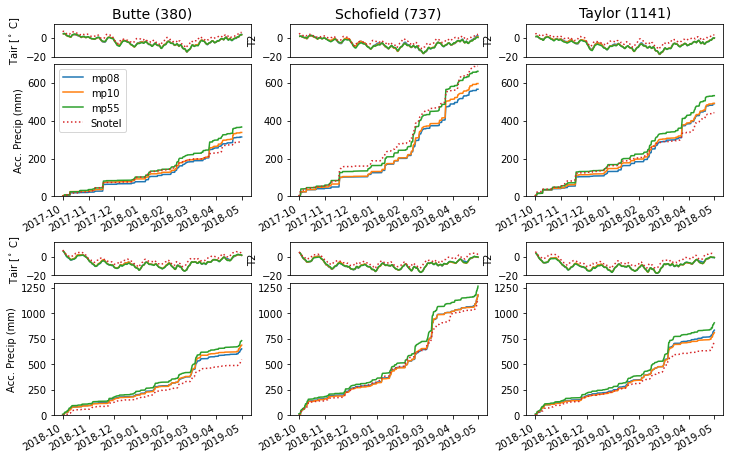

In [23]:
fig,ax = plt.subplots(5,3, gridspec_kw = {'height_ratios': [1, 4, .95, 1, 4], "hspace":0.1})

fig.set_size_inches(12, 8)
# wrf_at_taylor = (mp08_2018.sel(get_wrf_xy(tayl_lat, tayl_lon)).T2 -273.15)
# wrf_at_taylor_rolling

######## Schofield 
######## WY 2018

def plot_two_wy_precip(lat, lon, snotdf, column, ax, legend=False):
    mp08_2018_prcp = mp08_2018.sel(get_wrf_xy(lat, lon)).HR_PRCP.cumsum()
    mp10_2018_prcp = mp10_2018.sel(get_wrf_xy(lat, lon)).HR_PRCP.cumsum()
    mp55_2018_prcp = mp55_2018.sel(get_wrf_xy(lat, lon)).HR_PRCP.cumsum()

    # the counter is not reset on these two...
    #mp08_2018_prcp = mp08_2018_prcp - mp08_2018_prcp.isel(XTIME=0)
    #mp10_2018_prcp = mp10_2018_prcp - mp10_2018_prcp.isel(XTIME=0)


    mp08_2018_prcp.plot(label="mp08", ax=ax[1,column])
    mp10_2018_prcp.plot(label="mp10", ax=ax[1,column])
    mp55_2018_prcp.plot(label="mp55", ax=ax[1,column])

    # .plot(ax=ax, label='wrf')
    (snotdf.AccPrecip * 25.4).loc["2017-10-01":"2018-05-01"].plot(ax=ax[1,column], label='Snotel', linestyle=':')
    sntot1 = ((snotdf.AccPrecip * 25.4).loc["2018-04-30"])

    if legend:
        ax[1,column].legend()

    ######## WY 2019
    mp08_2019_prcp = mp08_2019.sel(get_wrf_xy(lat, lon)).ACCPRCP
    mp10_2019_prcp = mp10_2019.sel(get_wrf_xy(lat, lon)).ACCPRCP
    mp55_2019_prcp = mp55_2019.sel(get_wrf_xy(lat, lon)).ACCPRCP

    # the counter is not reset on these two...
    mp08_2019_prcp = mp08_2019_prcp - mp08_2019_prcp.isel(XTIME=0)
    mp10_2019_prcp = mp10_2019_prcp - mp10_2019_prcp.isel(XTIME=0)


    mp08_2019_prcp.plot(label="mp08", ax=ax[4,column])
    mp10_2019_prcp.plot(label="mp10", ax=ax[4,column])
    mp55_2019_prcp.plot(label="mp55", ax=ax[4,column])

    # .plot(ax=ax, label='wrf')
    (snotdf.AccPrecip * 25.4).loc["2018-10-01":"2019-05-01"].plot(ax=ax[4,column], label='Snotel', linestyle=':')
    sntot2 = ((snotdf.AccPrecip * 25.4).loc["2019-04-30"])

    d1 = pd.to_datetime("2018-04-30")
    print(((mp08_2018_prcp.sel(XTIME=d1) - sntot1)/sntot1).values)
    print(((mp10_2018_prcp.sel(XTIME=d1) - sntot1)/sntot1).values)
    print(((mp55_2018_prcp.sel(XTIME=d1) - sntot1)/sntot1).values)
    
    d2 = pd.to_datetime("2019-04-30")
    print(((mp08_2019_prcp.sel(XTIME=d2) - sntot2)/sntot2).values)
    print(((mp10_2019_prcp.sel(XTIME=d2) - sntot2)/sntot2).values)
    print(((mp55_2019_prcp.sel(XTIME=d2) - sntot2)/sntot2).values)
    #ax[4,column].legend()

    
def plot_two_wy_temp(lat, lon, snotdf, column, ax):
    mp08_2018_t2 = (mp08_2018.sel(get_wrf_xy(lat, lon)).T2 -273.15).rolling(XTIME=24*7).mean()
    mp10_2018_t2 = (mp10_2018.sel(get_wrf_xy(lat, lon)).T2 -273.15).rolling(XTIME=24*7).mean()
    mp55_2018_t2 = (mp55_2018.sel(get_wrf_xy(lat, lon)).T2 -273.15).rolling(XTIME=24*7).mean()


    mp08_2018_t2.plot(label="mp08", ax=ax[0,column])
    mp10_2018_t2.plot(label="mp10", ax=ax[0,column])
    mp55_2018_t2.plot(label="mp55", ax=ax[0,column])

    # plot the snotel 
    ((snotdf.TavgF - 32.)*(5/9)).loc["2017-10-01":"2018-05-01"].rolling(7).mean().plot(ax=ax[0,column], label='snotel', linestyle=':')

    ######## WY 2019
    mp08_2019_t2 = (mp08_2019.sel(get_wrf_xy(lat, lon)).T2 -273.15).rolling(XTIME=24*7).mean()
    mp10_2019_t2 = (mp10_2019.sel(get_wrf_xy(lat, lon)).T2 -273.15).rolling(XTIME=24*7).mean()
    mp55_2019_t2 = (mp55_2019.sel(get_wrf_xy(lat, lon)).T2 -273.15).rolling(XTIME=24*7).mean()

    # the counter is not reset on these two...
    mp08_2019_t2.plot(label="mp08", ax=ax[3,column])
    mp10_2019_t2.plot(label="mp10", ax=ax[3,column])
    mp55_2019_t2.plot(label="mp55", ax=ax[3,column])

    # plot the snotel..
    ((snotdf.TavgF - 32.)*(5/9)).loc["2018-10-01":"2019-05-01"].rolling(7).mean().plot(ax=ax[3,column], label='snotel', linestyle=':')
    
    snt = ((snotdf.TavgF - 32.)*(5/9)).loc["2018-10-01":"2019-05-01"].mean()
    wrf =  (mp10_2019.sel(get_wrf_xy(lat, lon)).T2 -273.15).mean().values
    #print(wrf - snt)
    
    
# plot the precips...
plot_two_wy_precip(bute_lat, bute_lon, df_butte,     0, ax, legend=True)
plot_two_wy_precip(scho_lat, scho_lon, df_schofield, 1, ax)
plot_two_wy_precip(tayl_lat, tayl_lon, df_taylor,    2, ax)

# plot the temps ...
plot_two_wy_temp(bute_lat, bute_lon, df_butte,     0, ax)
plot_two_wy_temp(scho_lat, scho_lon, df_schofield, 1, ax)
plot_two_wy_temp(tayl_lat, tayl_lon, df_taylor,    2, ax)


titles=["Butte (380)", "Schofield (737)", "Taylor (1141)"]

for i in range(3):
    ax[2,i].set_visible(False) # trick to have more of a buffer... 
    ax[0,i].set_xticks([])
    ax[3,i].set_xticks([])
    ax[0,i].set_ylim(-20,15)
    ax[3,i].set_ylim(-20,15)

    
ax[0,0].set_ylabel(r"Tair [$^\circ$ C]")
ax[3,0].set_ylabel(r"Tair [$^\circ$ C]")


for axx in ax.flatten():
    axx.set_title("")
    axx.set_xlabel("")
    
for i in range(3):
    # set the titles
    ax[0,i].set_title(titles[i], fontsize=14)
    ax[1,i].set_ylim(0,700) # wy 2018 ... low year 
    ax[4,i].set_ylim(0,1300) # wy 2019 ... high year 

# remove tye labels ... 
for i in range(1,3):
    ax[1,i].set_xlabel("")
    ax[4,i].set_xlabel("")
    ax[1,i].set_ylabel("")
    ax[4,i].set_ylabel("")
    
# rename some axes...
ax[1,0].set_ylabel("Acc. Precip (mm)")
ax[4,0].set_ylabel("Acc. Precip (mm)")


plt.savefig("SnotelPrecipTempCompareUpdated.png", facecolor='w', transparent=False, dpi=400)

In [22]:
np.array([0.09360378367187643,
          0.17684830091496517,
          0.2736209252430383,
          0.20767305427536634,
          0.2747470271644412,
          0.3617455849286254,
          -0.17769870569078558,
          -0.1340954202532883,
          -0.04181597369079568,
          0.03187068938934044,
          0.034090123255361635,
          0.11044093263834671,
          0.10816547736634795,
          0.11263346613796729,
          0.2038176173440516,
          0.1696914267243418,
          0.13689375157689831,
          0.26879040296799006]).mean() * 100

12.283458133133829

In [16]:
mp08_2019_prcp = mp08_2019.sel(get_wrf_xy(bute_lat, bute_lon)).ACCPRCP


In [17]:
mp08_2019_prcp

<xarray.DataArray 'ACCPRCP' (XTIME: 5088)>
dask.array<getitem, shape=(5088,), dtype=float64, chunksize=(744,), chunktype=numpy.ndarray>
Coordinates:
    XLAT     float32 dask.array<chunksize=(), meta=np.ndarray>
    XLONG    float32 dask.array<chunksize=(), meta=np.ndarray>
  * XTIME    (XTIME) datetime64[ns] 2018-10-01 ... 2019-04-30T23:00:00
Attributes:
    description:  ACCUMULATED GRID SCALE PRECIPITATION
    units:        mm

In [18]:
mp08_2019_prcp.sum() - (snotdf.AccPrecip * 25.4).loc["2018-10-01":"2019-05-01"].sum()

NameError: name 'snotdf' is not defined

In [ ]:
(-3.239796208414984 + -3.434065610838858 + -4.025094395947446)/3

In [ ]:
aso_dat1 = pl.Path("../250m_ModelRuns/regrid250m_ASO_50M_SWE_USCOGE_20180331_clipped_nobuffer_latlon.nc")
aso_dat2 = pl.Path("../250m_ModelRuns/regrid250m_ASO_50M_SWE_USCOGE_20190407_clipped_nobuffer_latlon.nc")

swe1=xr.open_dataset(aso_dat1)
swe2=xr.open_dataset(aso_dat2)

# swe = swe.rename({'__xarray_dataarray_variable__':'swe', 'lon': 'longitude', 'lat': 'latitude'})
# swe = swe.drop(['time', 'band'])
swevar1 = swe1.where(swe1>0).swe*1000
swevar2 = swe2.where(swe2>0).swe*1000

def get_aso_xy(lat, lon):
    #lat = 38.89
    #lon = -106.95
    xlat = swevar1.lat.values
    xlon = swevar1.lon.values
    dist = np.sqrt((xlat - lat)**2 + (xlon - lon)**2)
    mindist = dist.min()
    ixlat = np.argwhere(dist == mindist)[0][0]
    ixlon = np.argwhere(dist == mindist)[0][1]
    return {"south_north":slice(ixlat-1, ixlat+1), "west_east":slice(ixlon-1,ixlon+1)}


In [ ]:
swevar1.sel(get_aso_xy(bute_lat, bute_lon))

In [ ]:
fig,ax=plt.subplots(2,3)
fig.set_size_inches(18,12)

# do butte for wy 2018 
(df_butte.loc["2017-10-01":"2018-05-01"].SWE*25.4).plot(ax=ax[0,0])
(df_butte.loc["2017-10-01":"2018-05-01"].AccPrecip*25.4).plot(ax=ax[0,0])
x = pd.to_datetime("2018-03-31")

ax[0,0].scatter(x, swevar1.sel(get_aso_xy(bute_lat, bute_lon)).mean())


# do butte for wy 2019
(df_butte.loc["2018-10-01":"2019-05-01"].SWE*25.4).plot(ax=ax[1,0])
(df_butte.loc["2018-10-01":"2019-05-01"].AccPrecip*25.4).plot(ax=ax[1,0])
x = pd.to_datetime("2019-04-07")

ax[1,0].scatter(x, swevar2.sel(get_aso_xy(bute_lat, bute_lon)).mean())




# do scho for wy 2018 
(df_schofield.loc["2017-10-01":"2018-05-01"].SWE*25.4).plot(ax=ax[0,1])
(df_schofield.loc["2017-10-01":"2018-05-01"].AccPrecip*25.4).plot(ax=ax[0,1])
x = pd.to_datetime("2018-03-31")
                               

# do scho for wy 2019
(df_schofield.loc["2018-10-01":"2019-05-01"].SWE*25.4).plot(ax=ax[1,1], label='swe')
(df_schofield.loc["2018-10-01":"2019-05-01"].AccPrecip*25.4).plot(ax=ax[1,1], label='precip')
x = pd.to_datetime("2019-04-07")

ax[1,1].legend()
                         
    
    
# do scho for wy 2018 
(df_taylor.loc["2017-10-01":"2018-05-01"].SWE*25.4).plot(ax=ax[0,2])
(df_taylor.loc["2017-10-01":"2018-05-01"].AccPrecip*25.4).plot(ax=ax[0,2])
x = pd.to_datetime("2018-03-31")
                               

# do scho for wy 2019
(df_taylor.loc["2018-10-01":"2019-05-01"].SWE*25.4).plot(ax=ax[1,2], label='swe')
(df_taylor.loc["2018-10-01":"2019-05-01"].AccPrecip*25.4).plot(ax=ax[1,2], label='precip')
x = pd.to_datetime("2019-04-07")

ax[0,0].set_title("Butte Snotel")
ax[0,1].set_title("Scho. Snotel")
ax[0,2].set_title("Taylor. Snotel")